In [139]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [140]:
path_train = "Resources/datasets_137197_325031_train_u6lujuX_CVtuZ9i.csv"
path_test = "Resources/datasets_137197_325031_test_Y3wMUE5_7gLdaTN.csv"


In [141]:
train_df = pd.read_csv(path_train)
test_df = pd.read_csv(path_test)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [142]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [143]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [144]:
train_df['Credit_History'] = train_df['Credit_History'].astype('O')


In [145]:
train_df.describe(include = 'O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,564.0,614,614
unique,614,2,2,4,2,2,2.0,3,2
top,LP001868,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,1,489,398,345,480,500,475.0,233,422


In [146]:
# Loan_Status feature --- target variable
train_df['Loan_Status'] = train_df.Loan_Status.map({'Y': 1, 'N': 0}).astype(int)

In [147]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null object
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float64(3), int64(2), object(8)
memory usage: 62.4+ KB


In [148]:
train_df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [149]:
train_df['Gender'].isnull().sum()

13

In [150]:
# train_df.groupby('Gender').mean()['Loan_Status']
train_df[['Gender', 'Loan_Status']].groupby('Gender', as_index=False).mean()


,Gender,Loan_Status
0,Female,0.669643
1,Male,0.693252


In [151]:
train_df_grouped = train_df.groupby('Gender').mean()['Loan_Status']
# train_df[['Gender', 'Loan_Status']].groupby('Gender', as_index=False).mean()

ValueError: color kwarg must have one color per data set. 187 data sets and 2 colors were provided

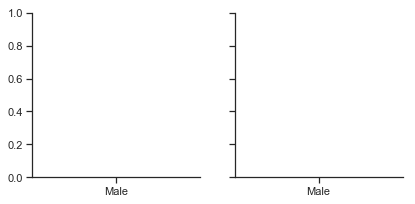

In [155]:

grid = sns.FacetGrid(train_df, col='Loan_Status')
grid.map(plt.hist, 'Gender',color=('green', 'gray'))

# g = sns.FacetGrid(train_df, col="Loan_Status")
# g.map(plt.hist, "Married");



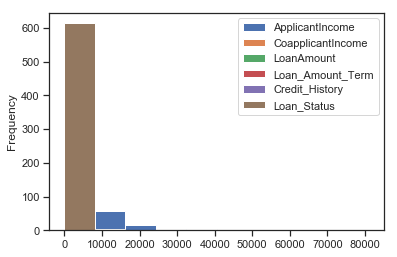

In [120]:
test = train_df.plot(kind="hist")